The challenge is to develop a ML model to predict the number of vehicles in an accident.

Notes:

* The task must be worked following the CRISP-DM methodology.
* The technical process must be clear to understand which steps have been done to get the final model.
* There must be a presentation to show the business value and the conclusions you get from the development.
* Any assumption on business value or data info can be done, but they should be commented and explained on the presentation.
* One week to resolve this challenge.

# Crisp-DM Methodology

![img](img/crispdm.png)

# 1. Business Understanding:
* Determine what has an impact on number of vehicles in an accident
* An accurate prediction of number of vehicles in an accident might help fire brigade or police to prepare before arriving at the accident place

In [126]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

from pycaret.regression import *
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import datetime
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


# 2. Data Understanding:

In [3]:
accidents = pd.read_csv('data/Accidents2016.csv')
accidents.shape

(136621, 32)

In [4]:
accidents.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                    float64
Junction_D

In [5]:
accidents.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

## **Describe Data:**
* Accident_Index - 
* Location_Easting_OSGR - 10 digit ordnance survey grid reference number, the first digit define the national 100 kilometre square, the second digit define the national 10 kilometre square, the third digit define the national 1 kilometre square, the fourth digit define the national 100 metre square, the fifth digit define the national 10 metre square
* Location_Northing_OSGR - same as above
* Longitude
* Latitude 
* Police_Force - Code number of the police force in whose area the accident occured.
* Accident_Severity - Seriousness of an accident
* Number_of_Vehicles - value to be predicted 
* Number_of_Casualties - number of casualties
* Date - Date of the accident
* Day_of_Week
* Time
* Local_Authority_(District) - Identificator of the local authority in whose are the accident occured **(Note: high ordinality categorical variable!)**
* Local_Authority_(Highway) - Identificator of the local authority in whose are the accident occured **(Note: high ordinality categorical variable!)**
* 1st_Road_Class - Road classification (main)
* 1st_Road_Number - Road number **(Note: high ordinality categorical variable!)**
* Road_Type - Type of the road
* Speed_limit
* Junction_Detail - Defines a place where two or more roads meet (within 20 metres of an accident)
* Junction_Control - Only for junction accidents
* 2nd_Road_Class - Road classification (for junction accidents only) **(Note: high ordinality categorical variable!)**
* 2nd_Road_Number - Road number (for junction accidents only)
* Pedestrian_Crossing-Human_Control - Encoding for every personal injury accident
* Pedestrian_Crossing-Physical_Facilities - Encoding for every personal injury accident
* Light_Conditions - Conditions of light at the accident 
* Weather_Conditions - Weather conditions
* Road_Surface_Conditions - Road surface conditions
* Special_Conditions_at_Site - Special conditions
* Carriageway_Hazards 
* Urban_or_Rural_Area
* Did_Police_Officer_Attend_Scene_of_Accident 
* LSOA_of_Accident_Location

In [8]:
accidents[accidents['Junction_Control']==-1]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1,E01000543
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,3,07:53,25,E09000018,3,312,3,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002583
6,2016010000020,527610.0,181430.0,-0.162234,51.517333,1,3,1,1,01/11/2016,3,08:53,1,E09000033,5,0,6,30.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01004658
13,2016010000033,536290.0,166630.0,-0.042906,51.382307,1,2,1,1,01/11/2016,3,08:30,20,E09000008,5,0,6,30.0,0,-1,-1,0,0,0,1,7,1,0,0,1,1,E01001132
23,2016010000053,525750.0,179560.0,-0.189693,51.500944,1,3,1,1,01/11/2016,3,13:52,12,E09000020,6,0,6,30.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136613,2016984130516,303721.0,611256.0,-3.521310,55.385824,98,3,1,1,26/10/2016,4,17:00,917,S12000006,2,74,3,70.0,0,-1,-1,0,0,0,1,1,1,0,0,2,1,NaN
136615,2016984130816,326226.0,566974.0,-3.154598,54.991888,98,3,2,1,27/10/2016,5,12:00,917,S12000006,3,75,6,60.0,0,-1,-1,0,0,0,1,1,1,0,0,2,1,NaN
136618,2016984131216,322903.0,573365.0,-3.208249,55.048803,98,3,1,1,27/10/2016,5,07:10,917,S12000006,2,74,3,70.0,0,-1,-1,0,0,0,6,1,2,0,0,2,1,NaN
136619,2016984131316,318673.0,566850.0,-3.272584,54.989597,98,3,1,3,29/10/2016,7,20:00,917,S12000006,4,724,6,40.0,0,-1,-1,0,0,0,4,1,1,0,0,2,1,NaN


## **Explore Data**

In [16]:
for col in accidents.columns:
    nulls = accidents[accidents[col]==-1].count()[0]
    nulls += accidents[accidents[col].isna()].count()[0]
    print("Number of null values for column {}: {}".format(col, nulls))

Number of null values for column Accident_Index: 0
Number of null values for column Location_Easting_OSGR: 7
Number of null values for column Location_Northing_OSGR: 7
Number of null values for column Longitude: 7
Number of null values for column Latitude: 7
Number of null values for column Police_Force: 0
Number of null values for column Accident_Severity: 0
Number of null values for column Number_of_Vehicles: 0
Number of null values for column Number_of_Casualties: 0
Number of null values for column Date: 0
Number of null values for column Day_of_Week: 0
Number of null values for column Time: 2
Number of null values for column Local_Authority_(District): 0
Number of null values for column Local_Authority_(Highway): 0
Number of null values for column 1st_Road_Class: 0
Number of null values for column 1st_Road_Number: 0
Number of null values for column Road_Type: 1
Number of null values for column Speed_limit: 37
Number of null values for column Junction_Detail: 106
Number of null valu

null values for 'Junction_Control', '2nd_Road_Class' and '2nd_Road_Number' might indicate that there is not much data for accidents which include more than 1 road. It is pretty obvious that these accidents should involve more than 1 vehicle and we should create a separate indicator for these situations. i.e. 'More_than_one_road' flag.

In [17]:
accidents.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,136614.000000,1.366140e+05,136614.000000,136614.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136584.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000
mean,448699.363169,2.883354e+05,-1.304881,52.482399,29.860402,2.816170,1.848179,1.327644,4.115890,342.786680,4.143638,919.997145,5.183735,37.943683,2.233002,1.696313,2.647712,321.590678,0.011192,0.824375,1.983509,1.553099,1.291697,0.085338,0.055409,1.352508,1.253965
std,95230.253169,1.570588e+05,1.398947,1.414390,25.252440,0.418152,0.710117,0.789296,1.917292,258.403794,1.456215,1753.634022,1.658072,14.041669,2.501116,2.354033,3.226569,1202.759007,0.154659,1.927500,1.676938,1.690541,0.588247,0.654925,0.557042,0.477860,0.464658
min,76702.000000,1.107500e+04,-7.389809,49.919716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,20.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,386355.750000,1.764248e+05,-2.204357,51.473779,6.000000,3.000000,1.000000,1.000000,2.000000,102.000000,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,454126.000000,2.374855e+05,-1.201205,52.025165,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,65.000000,6.000000,30.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,527660.000000,3.897438e+05,-0.159708,53.401675,45.000000,3.000000,2.000000,1.000000,6.000000,516.000000,6.000000,640.000000,6.000000,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000
max,655256.000000,1.178623e+06,1.757858,60.490191,98.000000,3.000000,16.000000,58.000000,7.000000,941.000000,6.000000,9918.000000,9.000000,70.000000,9.000000,4.000000,6.000000,9999.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,3.000000


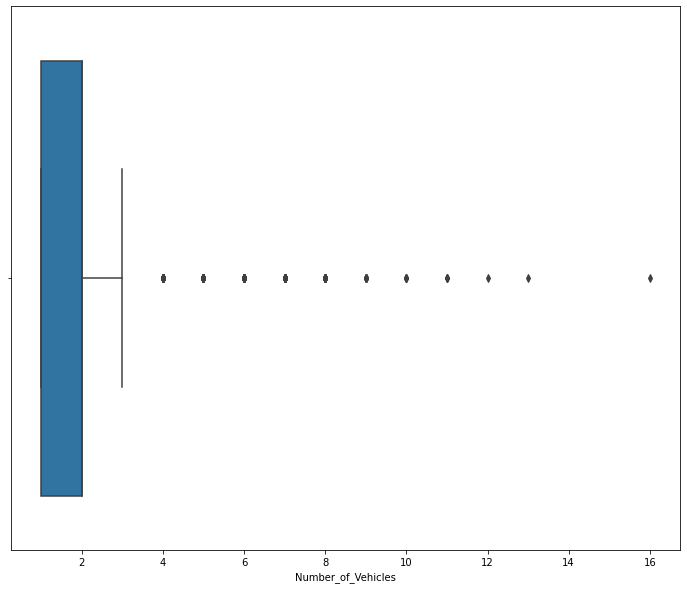

In [27]:
plt.figure(figsize=(12,10))
sns.boxplot(data=accidents, x='Number_of_Vehicles');

In [28]:
accidents['Number_of_Vehicles'].value_counts()

2     82866
1     39537
3     10964
4      2446
5       517
6       169
7        72
8        26
9        11
10        6
11        4
16        1
13        1
12        1
Name: Number_of_Vehicles, dtype: int64

The most common accidents were these with 2 cars involved. Accidents with more than 3 cars involved are rather rare

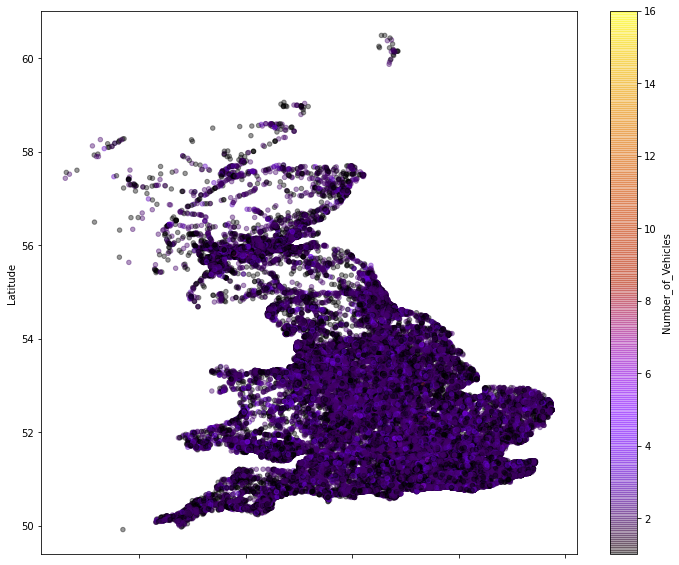

In [41]:
accidents.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4,
               figsize=(12,10), c='Number_of_Vehicles', cmap=plt.get_cmap('gnuplot'), colorbar=True);

In [44]:
accidents.corr()['Number_of_Vehicles'].sort_values(ascending=False)

Number_of_Vehicles                             1.000000
Number_of_Casualties                           0.245029
Speed_limit                                    0.114333
Accident_Severity                              0.074050
Urban_or_Rural_Area                            0.057306
Junction_Control                               0.051537
Junction_Detail                                0.048415
2nd_Road_Class                                 0.045644
Local_Authority_(District)                     0.015437
2nd_Road_Number                                0.013642
Longitude                                      0.013616
Location_Easting_OSGR                          0.013015
Police_Force                                   0.010832
Day_of_Week                                   -0.005823
Special_Conditions_at_Site                    -0.009772
1st_Road_Number                               -0.012351
Latitude                                      -0.023120
Location_Northing_OSGR                        -0

Pearson's coefficient does not indicate that we have any strong correlation between any variable and the number of vehicles.

### Before data preparation I will build a simple linear regression model for future reference

In [47]:
accidents.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                    float64
Junction_D

Date, Time, Local_Authority_(Highway) and LSOA_of_Accident_Location have to be dropped.

In [49]:
predictors = [x for x in accidents.columns if x not in ('Accident_Index', 'Number_of_Vehicles', 'Date', 'Time', 
                                                        'Local_Authority_(Highway)', 'LSOA_of_Accident_Location')]
X = accidents.dropna().loc[:, predictors]
y = accidents.dropna().loc[:, 'Number_of_Vehicles'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=123, stratify=y)

X_stats = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_stats).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     482.3
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        10:19:19   Log-Likelihood:            -1.0427e+05
No. Observations:              102585   AIC:                         2.086e+05
Df Residuals:                  102558   BIC:                         2.088e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                         -56.7839     12.702     -4.470      0.000     -81.680     -31.888
Location_Easting_OSGR                        4.587e-06   1.21e-06      3.792      0.000    2.22e-06    6.96e-06
Location_Northing_OSGR                      -9.906e-06   2.31e-06     -4.284      0.000   -1.44e-05   -5.37e-06
Longitude                                      -0.3028      0.084     -3.625      0.000      -0.467      -0.139
Latitude                                        1.1182      0.256      4.360      0.000       0.616       1.621
Police_Force                                    0.0019      0.001      3.319      0.001       0.001       0.003
Accident_Severity                               0.1516      0.005     29.791      0.000       0.142       0.162
Number_of_Casualties                            0.2062      0.003     76.809      0.000       0.201       0.211
Day_of_Week                                    -0.0010      0.001     -0.961      0.337      -0.003       0.001
Local_Authority_(District)                   2.588e-05   5.09e-05      0.509      0.611   -7.38e-05       0.000
1st_Road_Class                                 -0.0586      0.002    -34.423      0.000      -0.062      -0.055
1st_Road_Number                             -1.177e-05   1.28e-06     -9.214      0.000   -1.43e-05   -9.27e-06
Road_Type                                      -0.0131      0.001     -9.376      0.000      -0.016      -0.010
Speed_limit                                     0.0031      0.000     13.869      0.000       0.003       0.004
Junction_Detail                                 0.0116      0.001      9.184      0.000       0.009       0.014
Junction_Control                               -0.0045      0.003     -1.781      0.075      -0.010       0.000
2nd_Road_Class                                  0.0130      0.002      6.718      0.000       0.009       0.017
2nd_Road_Number                              3.719e-06   1.85e-06      2.011      0.044    9.45e-08    7.34e-06
Pedestrian_Crossing-Human_Control              -0.0777      0.014     -5.545      0.000      -0.105      -0.050
Pedestrian_Crossing-Physical_Facilities        -0.0268      0.001    -22.642      0.000      -0.029      -0.024
Light_Conditions                               -0.0273      0.001    -21.426      0.000      -0.030      -0.025
Weather_Conditions                             -0.0066      0.001     -5.266      0.000      -0.009      -0.004
Road_Surface_Conditions                        -0.0485      0.004    -12.897      0.000      -0.056      -0.041
Special_Conditions_at_Site                     -0.0132      0.003     -4.052      0.000      -0.020      -0.007
Carriageway_Hazards                            -0.0380     

In [59]:
X_stats_test = sm.add_constant(X_test)
y_pred = model.predict(X_stats_test)

r2_score(Y_test, y_pred)

0.11083388114212434

# 3. Data Preparation

# Feature engineering
1. Convert Date and Time to timestamp and create hour, month, period of day, day of week and season attributes
2. Split and convert to numerical and categorical columns and create plots

In [60]:
categorical_cols = ['Police_Force', 'Accident_Severity', 'Day_of_Week', '1st_Road_Class', 'Road_Type', 'Speed_limit', 
                    'Junction_Detail', 'Junction_Control', '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control',
                    'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 
                    'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
                   'Did_Police_Officer_Attend_Scene_of_Accident', 'More_Than_One_Road']
numerical_cols = ['Number_of_Casualties']

def convertToDatetime(df:pd.DataFrame):
    if all(item in df.columns for item in ['Date', 'Time']) and 'Datetime' not in df.columns:
        df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M', errors='coerce')
        df.drop(['Date', 'Time'], axis=1, inplace=True)
        #df.dropna(subset=['Datetime'], inplace=True)

def mapHours(hour:int) -> str:
    if hour < 6:
        return 'Early morning'
    elif hour < 10:
        return 'Morning commute'
    elif hour < 13:
        return 'Morning'
    elif hour < 16:
        return 'Afternoon'
    elif hour < 19:
        return 'Afternoon commute'
    elif hour < 23:
        return 'Evening'
    else:
        return 'Night'
    
def mapMonths(month:int) -> str:
    if month < 3:
        return 'Winter'
    elif month < 6:
        return 'Spring'
    elif month < 9:
        return 'Summer'
    elif month < 12:
        return 'Autumn'
    else:
        return 'Winter'
    
def generateFeaturesFromDatetime(df:pd.DataFrame):
    if 'Datetime' in df.columns:
        df['Hour'] = pd.Categorical(df['Datetime'].dt.hour)
        df['Month'] = pd.Categorical(df['Datetime'].dt.month)
        df['Period_of_Day'] = pd.Categorical(df['Hour'].map(mapHours))
        df['Season'] = pd.Categorical(df['Month'].map(mapMonths))
        
def convertToCategorical(df:pd.DataFrame, cols:list):
    for col in cols:
        df[col] = pd.Categorical(df[col])
        
def dropColumns(df:pd.DataFrame, cols:list):
    df.drop(cols, axis=1, inplace=True)
    
def mapNumbersToDefinitions(df:pd.DataFrame, colMapping: dict) -> pd.DataFrame:
    new_df = df.copy()
    for col, mapping in columns_mapping.items():
        new_df[col] = df[col].map(mapping)
    return new_df

def isMoreThanOneRoad(junction_control:int) -> int:
    if junction_control < 0:
        return 1
    else:
        return 0
    
def moreThanOneRoad(df:pd.DataFrame):
    df['More_Than_One_Road'] = pd.Categorical(df['Junction_Control'].map(isMoreThanOneRoad)) 
    
def prepareDf(df:pd.DataFrame) -> pd.DataFrame:
    new_df = df.copy()
    convertToDatetime(new_df)
    generateFeaturesFromDatetime(new_df)
    moreThanOneRoad(new_df)
    convertToCategorical(new_df, categorical_cols)

In [64]:
accidents.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                    float64
Junction_D

In [66]:
df = prepareDf(accidents)
df.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                 float64
Location_Northing_OSGR                                float64
Longitude                                             float64
Latitude                                              float64
Police_Force                                         category
Accident_Severity                                    category
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Day_of_Week                                          category
Local_Authority_(District)                              int64
Local_Authority_(Highway)                              object
1st_Road_Class                                       category
1st_Road_Number                                         int64
Road_Type                                            category
Speed_limit                                          category
Junction

In [67]:
df = df[df['Datetime'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136619 entries, 0 to 136620
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               136619 non-null  object        
 1   Location_Easting_OSGR                        136612 non-null  float64       
 2   Location_Northing_OSGR                       136612 non-null  float64       
 3   Longitude                                    136612 non-null  float64       
 4   Latitude                                     136612 non-null  float64       
 5   Police_Force                                 136619 non-null  category      
 6   Accident_Severity                            136619 non-null  category      
 7   Number_of_Vehicles                           136619 non-null  int64         
 8   Number_of_Casualties                         136619 non-null  in

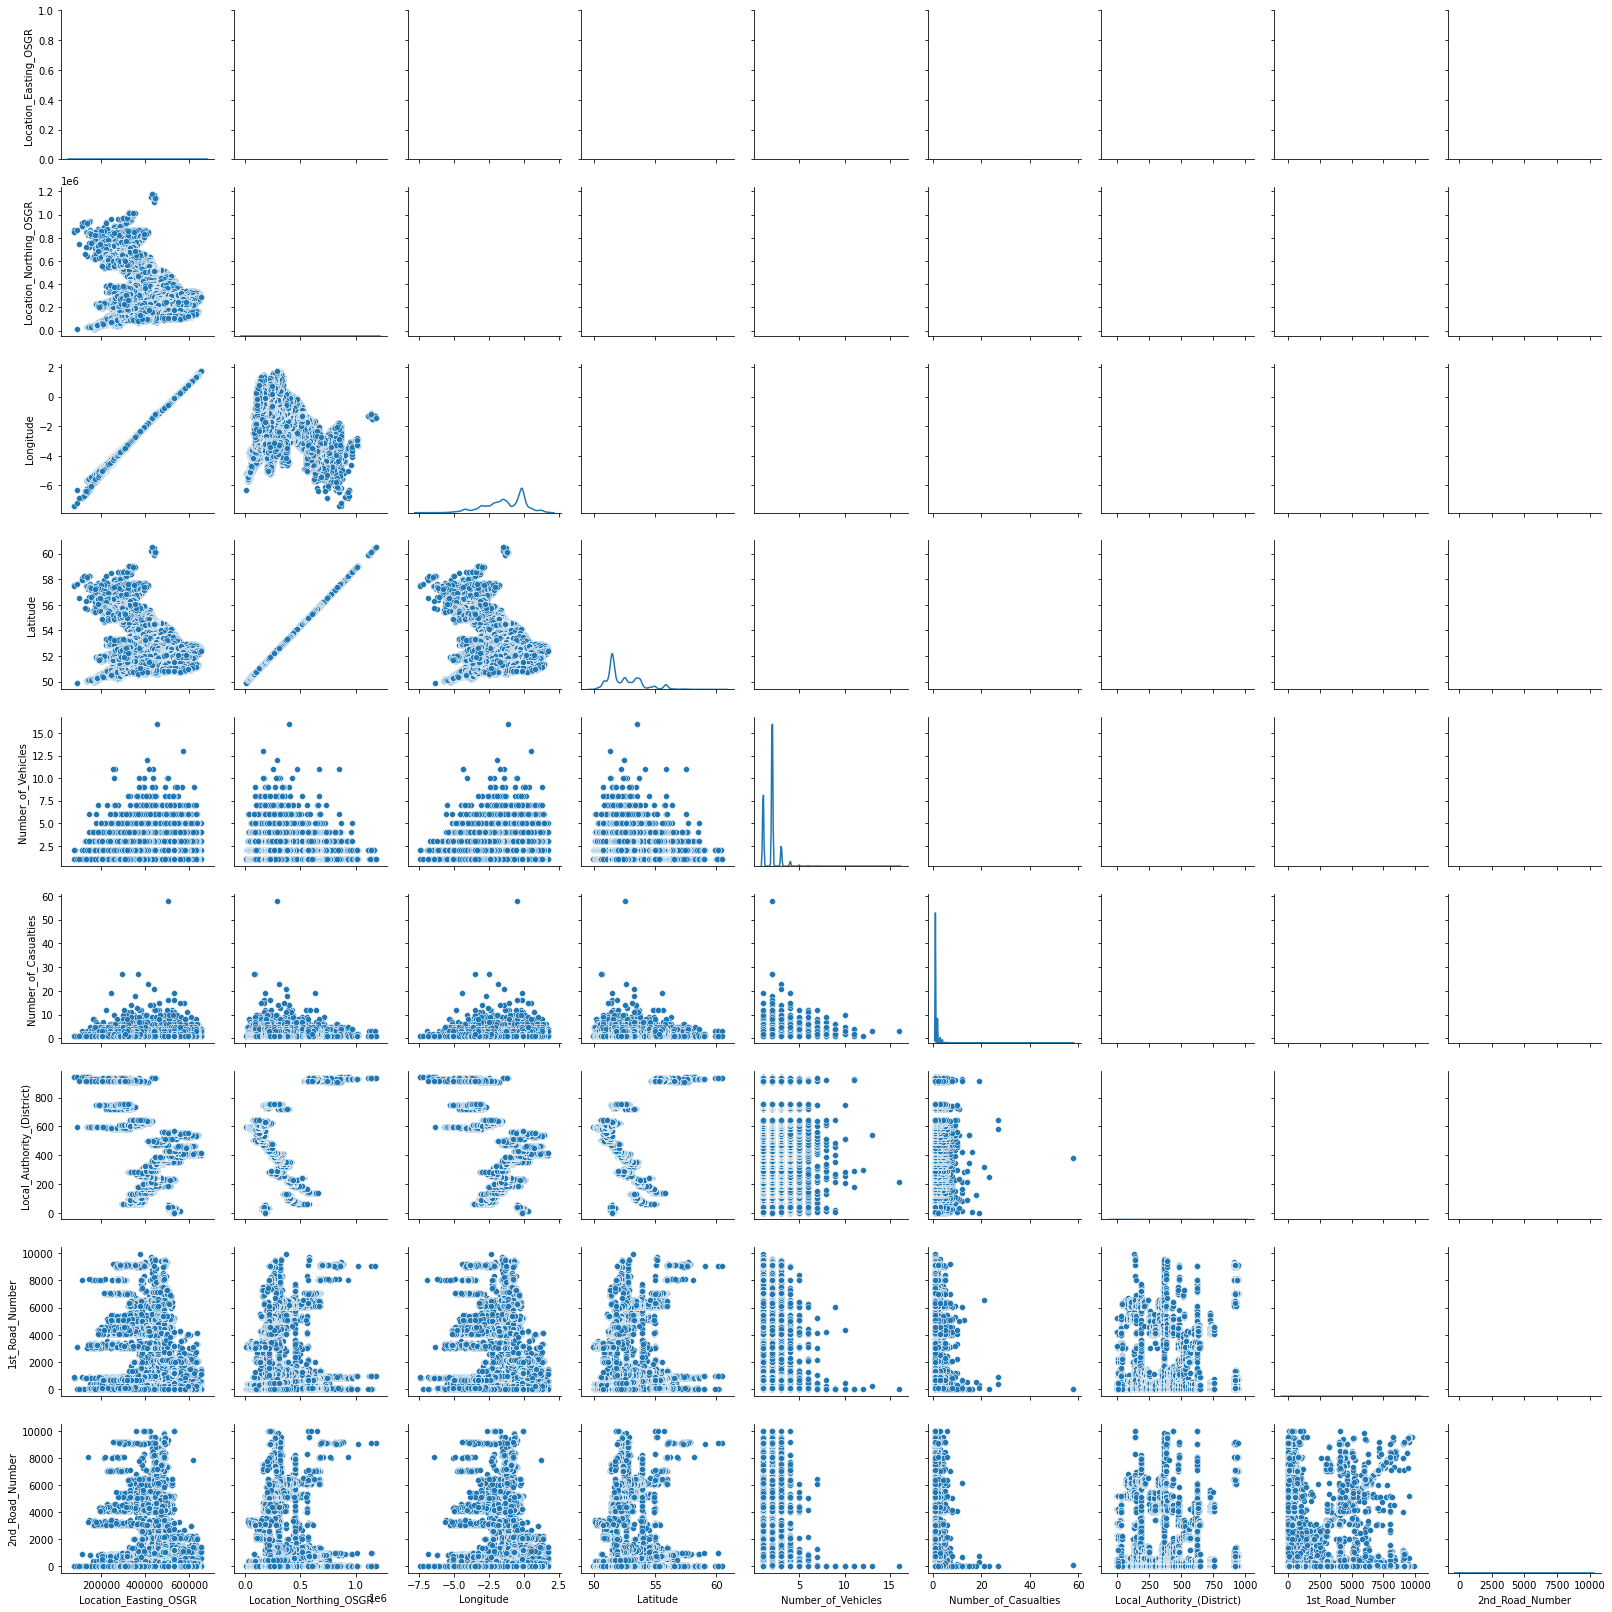

In [68]:
g = sns.PairGrid(df)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
plt.tight_layout()
plt.show();

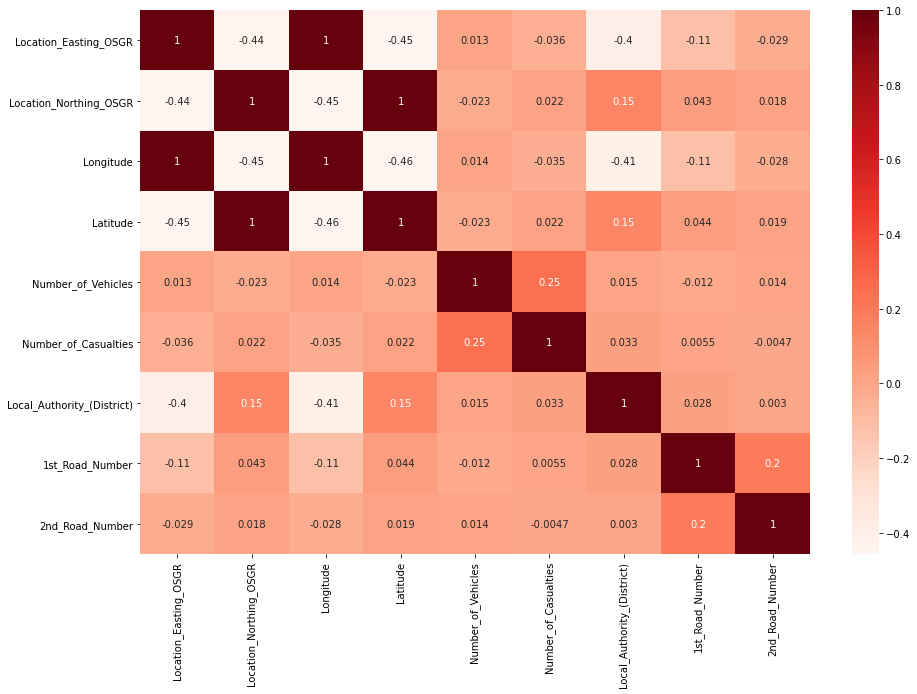

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds);

## Map numbers to strings for plots

In [73]:
columns_mapping = {'Accident_Severity': {1: 'Fatal',
                                        2: 'Serious',
                                        3: 'Slight'},
                  'Day_of_Week': {1: 'Sunday',
                                 2: 'Monday',
                                 3: 'Tuesday',
                                 4: 'Wednesday',
                                 5: 'Thursday',
                                 6: 'Friday',
                                 7: 'Saturday'},
                  '1st_Road_Class': {1: 'Motorway',
                                    2: 'A(M)',
                                    3: 'A',
                                    4: 'B',
                                    5: 'C',
                                    6: 'Unassigned'},
                  'Road_Type': {-1: np.nan,
                               1: 'Roundabout',
                               2: 'One way street',
                               3: 'Dual carriageway',
                               6: 'Single carriageway',
                               7: 'Slip Road',
                               9: 'Unknown'},
                  'Junction_Detail': {-1: np.nan,
                                     0: 'Not at or within 20 metres of junction',
                                     1: 'Roundabout',
                                     2: 'Mini roundabout',
                                     3: 'T or staggered junction',
                                     5: 'Slip road',
                                     6: 'Crossroads',
                                     7: 'Multiple junction',
                                     8: 'Using private drive or entrance',
                                     9: 'Other junction'},
                  'Junction_Control': {-1: np.nan,
                                      0: np.nan,
                                      1: 'Authorised person',
                                      2: 'Automatic traffic singal',
                                      3: 'Stop sign',
                                      4: 'Give way or uncontrolled'},
                  '2nd_Road_Class': {-1: np.nan,
                                    1: 'Motorway',
                                    2: 'A(M)',
                                    3: 'A',
                                    4: 'B',
                                    5: 'C',
                                    6: 'Unassigned'},
                  'Pedestrian_Crossing-Human_Control': {-1: np.nan,
                                                       0: 'None within 50 metres',
                                                       1: 'Control by school crossing patrol',
                                                       2: 'Control by other authorised person'},
                  'Pedestrian_Crossing-Physical_Facilities': {-1: np.nan,
                                                             0: 'No physical crossing facility within 50 metres',
                                                             1: 'Zebra crossing',
                                                             4: 'Pelican, puffin, toucan or similar non-junction pedestrian light crossing',
                                                             5: 'Pedestrian phase at traffic signal junction',
                                                             7: 'Footbridge or subway',
                                                             8: 'Ceentral refuge - no other controls'},
                  'Light_Conditions': {-1: np.nan,
                                     1: 'Daylight: street lights present',
                                     2: 'Daylight: no street lighting',
                                     3: 'Daylight: street lighting unknown',
                                     4: 'Darkness: street lights present and lit',
                                     5: 'Darkness: street lights present but unlit',
                                     6: 'Darkness: no street lighting',
                                     7: 'Darkness: street lighting unknown'},
                  'Weather_Conditions': {-1: np.nan,
                                        1: 'Fine without high winds',
                                        2: 'Raining without high winds',
                                        3: 'Snowing without high winds',
                                        4: 'Fine with high winds',
                                        5: 'Raining with high winds',
                                        6: 'Snowing with high winds',
                                        7: 'Fog or mist - if hazard',
                                        8: 'Other',
                                        9: 'Unknown'},
                  'Road_Surface_Conditions': {-1: np.nan,
                                          1: 'Dry',
                                          2: 'Wet/Damp',
                                          3: 'Snow',
                                          4: 'Frost/Ice',
                                          5: 'Flood'},
                  'Special_Conditions_at_Site': {-1: np.nan,
                                                0: 'None',
                                                1: 'Automatic traffic signal out',
                                                2: 'Automatic traffic signal partially defective',
                                                3: 'Permament road signing or marking defective or obscured',
                                                4: 'Roadworks',
                                                5: 'Road surface defective',
                                                6: 'Oil or diesel',
                                                7: 'Mud'},
                  'Carriageway_Hazards': {-1: np.nan,
                                         0: 'None',
                                         1: 'Dislodged vehicle load in carriageway',
                                         2: 'Other object in carriageway',
                                         3: 'Involvement with previous accident',
                                         6: 'Pedestrian in carriageway - not injured',
                                         7: 'Any animal in carriageway'},
                  'Urban_or_Rural_Area': {1: 'Urban',
                                         2: 'Rural',
                                         3: 'Unallocated'},
                  'Did_Police_Officer_Attend_Scene_of_Accident': {-1: np.nan,
                                                                 1: 'Yes',
                                                                 2: 'No', 
                                                                 3: 'No - accident was reported using a self completion form'},
                  'More_Than_One_Road' : {1: 'Yes',
                                         0: 'No'}}

In [74]:
descriptive_df = mapNumbersToDefinitions(df, columns_mapping)
descriptive_df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Datetime,Hour,Month,Period_of_Day,Season,More_Than_One_Road
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,Slight,2,1,Tuesday,28,E09000005,A,4006,Single carriageway,30.0,Not at or within 20 metres of junction,NaN,NaN,0,None within 50 metres,No physical crossing facility within 50 metres,Darkness: street lights present but unlit,Fine without high winds,Dry,None,None,Urban,Yes,E01000543,2016-11-01 02:30:00,2.0,11.0,Early morning,Autumn,Yes
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,Slight,1,1,Tuesday,18,E09000004,A,207,Single carriageway,30.0,Other junction,Give way or uncontrolled,Unassigned,0,None within 50 metres,No physical crossing facility within 50 metres,Darkness: street lights present and lit,Fine without high winds,Dry,None,None,Urban,Yes,E01000375,2016-11-01 00:37:00,0.0,11.0,Early morning,Autumn,No
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,Slight,1,1,Tuesday,26,E09000017,A,4020,Roundabout,30.0,Roundabout,Give way or uncontrolled,A,4020,None within 50 metres,No physical crossing facility within 50 metres,Darkness: street lights present and lit,Fine without high winds,Dry,None,None,Urban,Yes,E01033725,2016-11-01 01:25:00,1.0,11.0,Early morning,Autumn,No
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,Slight,1,1,Tuesday,22,E09000024,A,217,Single carriageway,30.0,T or staggered junction,Automatic traffic singal,A,217,None within 50 metres,No physical crossing facility within 50 metres,Daylight: street lights present,Fine without high winds,Dry,None,None,Urban,Yes,E01003379,2016-11-01 09:15:00,9.0,11.0,Morning commute,Autumn,No
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,Slight,2,1,Tuesday,25,E09000018,A,312,Dual carriageway,40.0,Not at or within 20 metres of junction,NaN,NaN,0,None within 50 metres,No physical crossing facility within 50 metres,Daylight: street lights present,Fine without high winds,Dry,None,None,Urban,Yes,E01002583,2016-11-01 07:53:00,7.0,11.0,Morning commute,Autumn,Yes


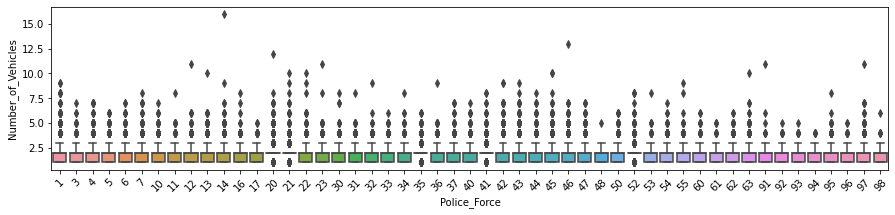

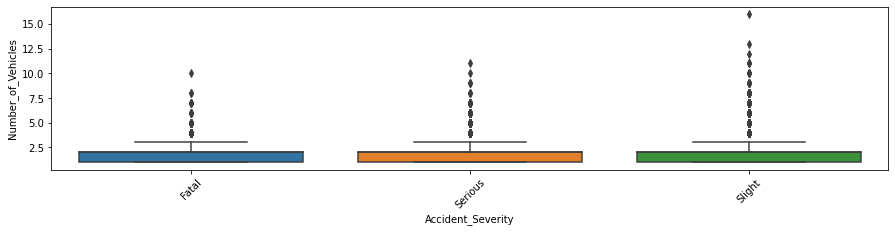

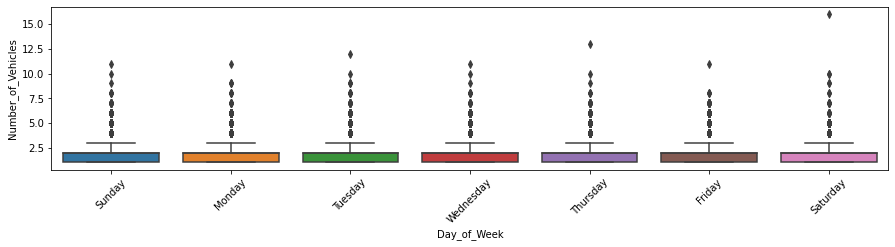

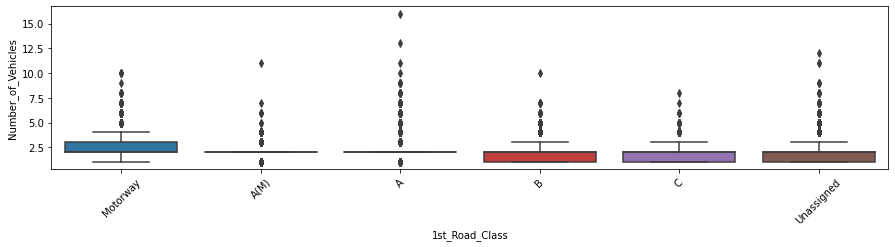

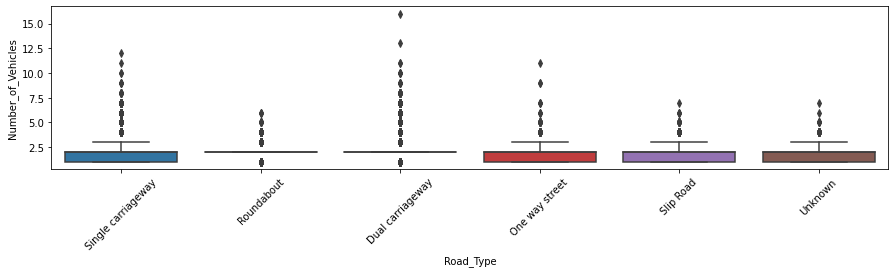

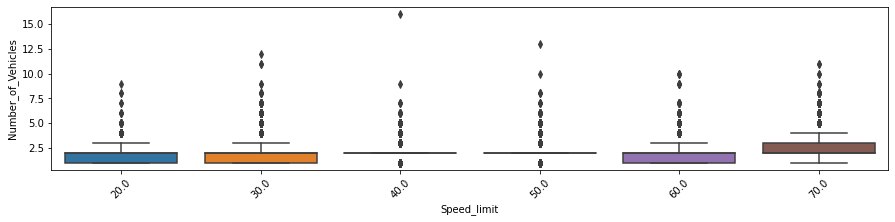

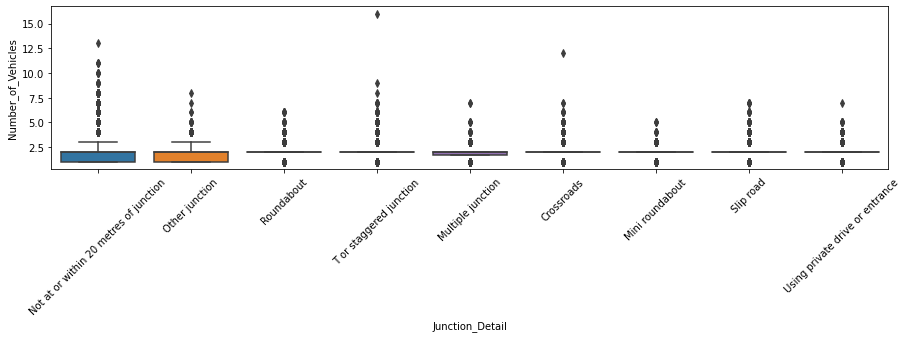

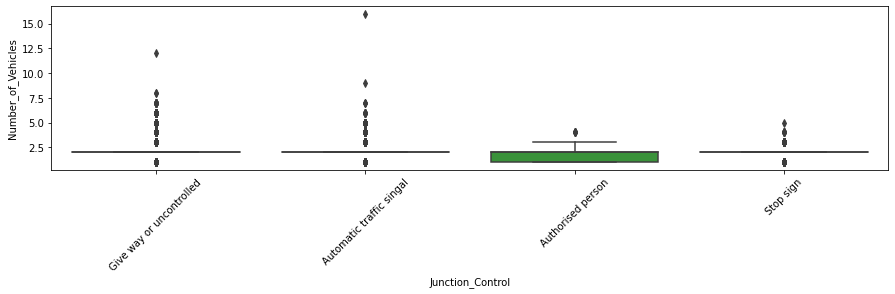

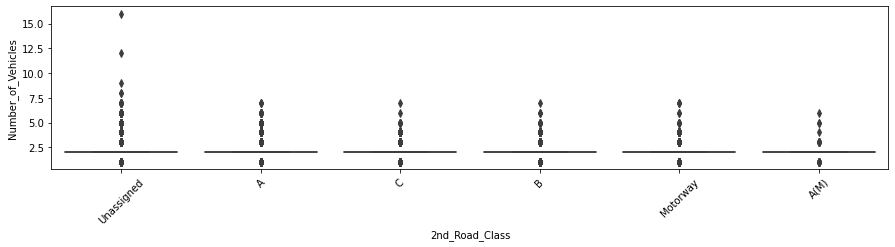

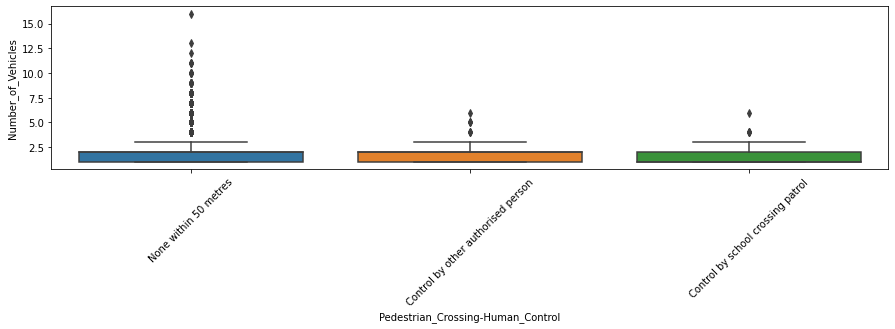

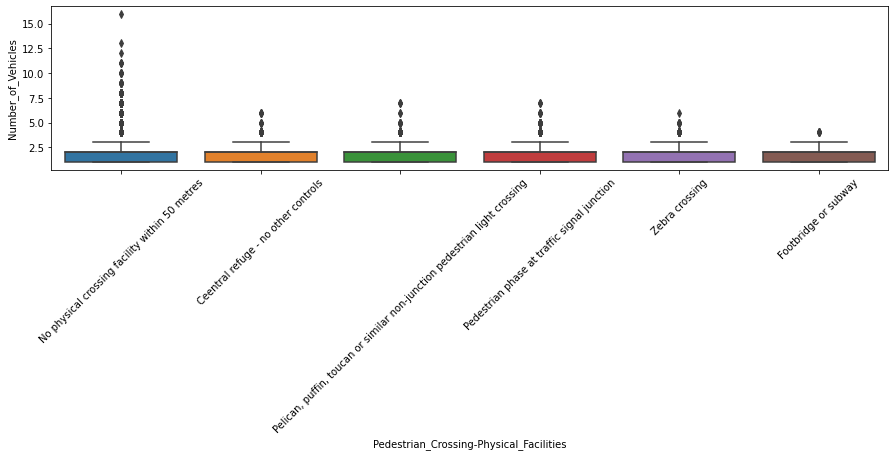

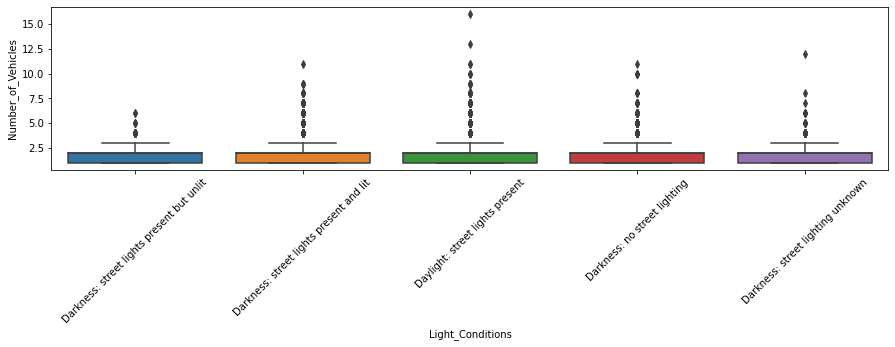

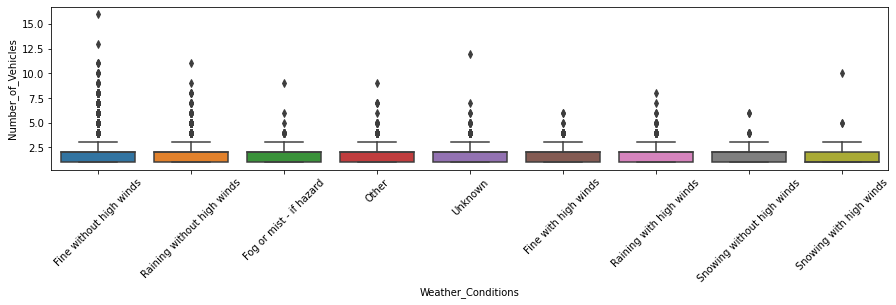

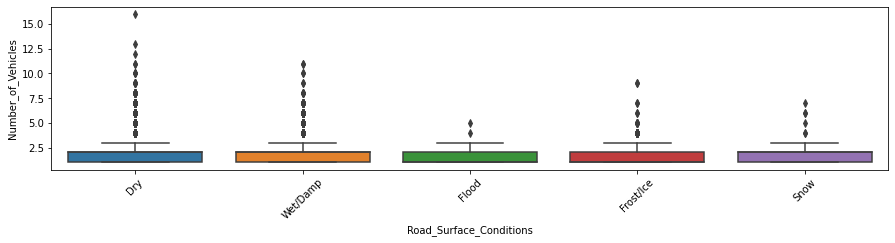

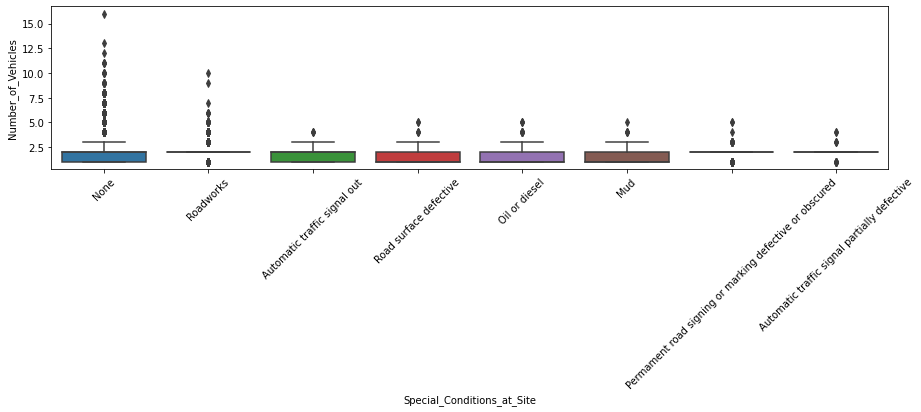

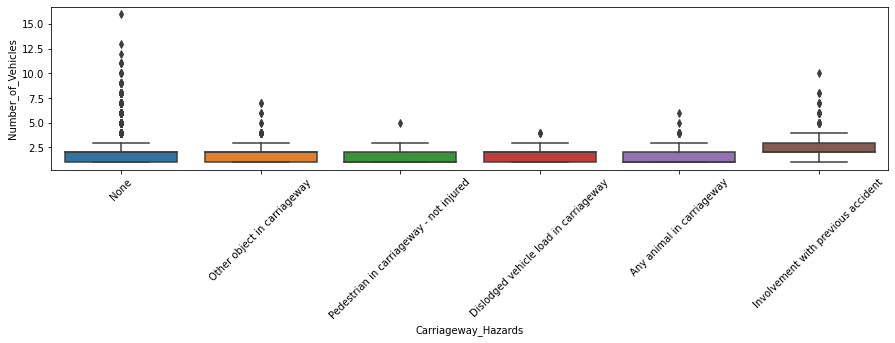

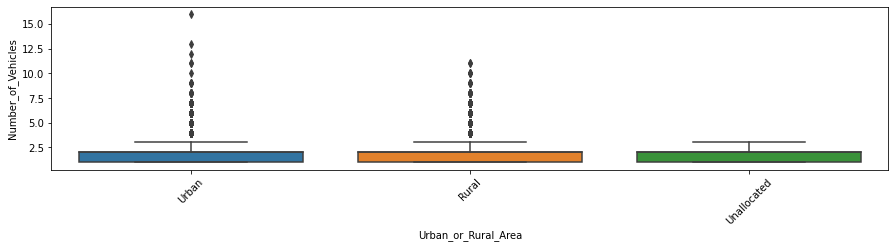

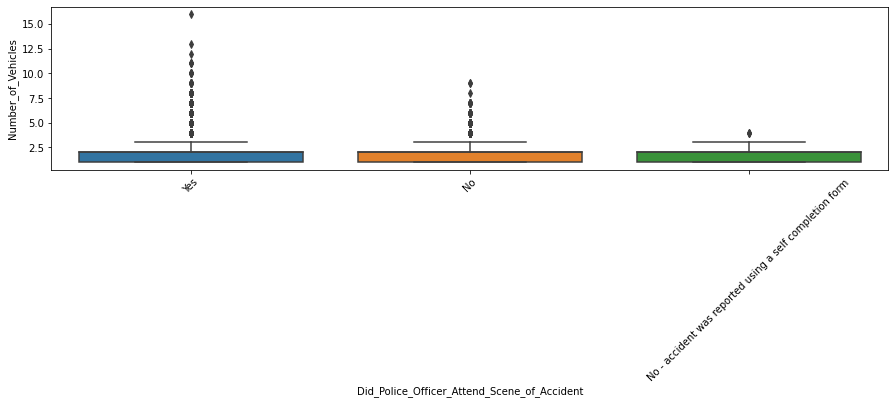

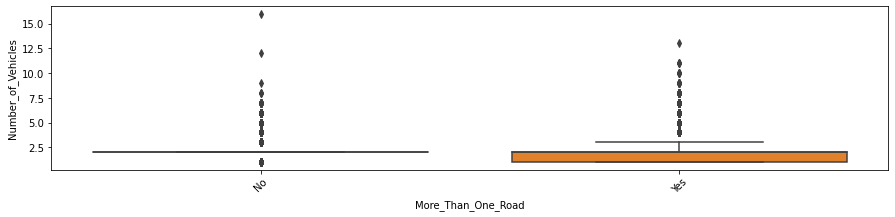

In [77]:
for col in categorical_cols:
    plt.figure(figsize=(15,3))
    ax = sns.boxplot(x=descriptive_df[col], y=descriptive_df['Number_of_Vehicles'])
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.show();

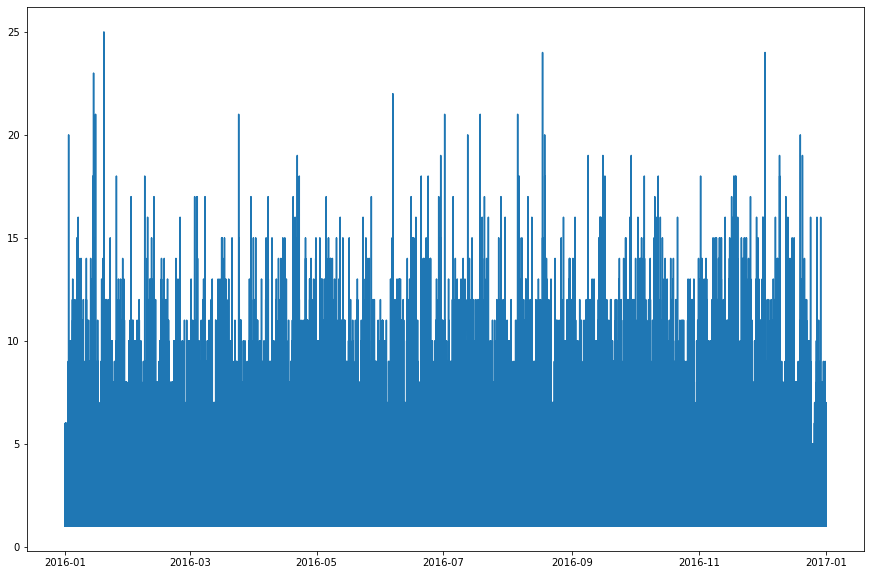

In [78]:
grouped_df = df[['Datetime', 'Number_of_Vehicles']].groupby('Datetime').sum().reset_index()
x = grouped_df.loc[:, 'Datetime']
y = grouped_df.loc[:, 'Number_of_Vehicles']
plt.figure(figsize=(15,10))
plt.plot(x,y);

# 4. Data Modeling
1. Perform pyCaret search to identify better performing algorithms and overall r_squared values
2. Validate models quality
3. Generate models manually / optimize previously generated models
4. Assessment

### Model Development with Pycaret

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136619 entries, 0 to 136620
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               136619 non-null  object        
 1   Location_Easting_OSGR                        136612 non-null  float64       
 2   Location_Northing_OSGR                       136612 non-null  float64       
 3   Longitude                                    136612 non-null  float64       
 4   Latitude                                     136612 non-null  float64       
 5   Police_Force                                 136619 non-null  category      
 6   Accident_Severity                            136619 non-null  category      
 7   Number_of_Vehicles                           136619 non-null  int64         
 8   Number_of_Casualties                         136619 non-null  in

In [80]:
setup(df, 
      target='Number_of_Vehicles',
      ignore_features = ['Accident_Index',
                        'Location_Easting_OSGR',
                        'Location_Northing_OSGR',
                        'Day_of_Week',
                        'Hour',
                        'Month',
                        'Period_of_Day',
                        'Season'
                        ],
     categorical_features=['1st_Road_Number',
                          '2nd_Road_Number',
                          'Local_Authority_(District)',
                          'More_Than_One_Road'],
      numeric_features=['Number_of_Casualties'],
     normalize=True,
     normalize_method='robust',
    high_cardinality_features=['Local_Authority_(District)',
                             'Local_Authority_(Highway)',
                             '1st_Road_Number',
                             '2nd_Road_Number',
                             'LSOA_of_Accident_Location'],
     high_cardinality_method='frequency'
     )

,Description,Value
0,session_id,5198
1,Target,Number_of_Vehicles
2,Original Data,"(136619, 36)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,23
6,Ordinal Features,False
7,High Cardinality Features,True
8,High Cardinality Method,frequency
9,Transformed Train Set,"(95633, 204)"


({'lr': <pycaret.containers.models.regression.LinearRegressionContainer at 0x7f18fd44ca00>,
  'lasso': <pycaret.containers.models.regression.LassoRegressionContainer at 0x7f18fd44c5b0>,
  'ridge': <pycaret.containers.models.regression.RidgeRegressionContainer at 0x7f18fd44c190>,
  'en': <pycaret.containers.models.regression.ElasticNetContainer at 0x7f18fd44c310>,
  'lar': <pycaret.containers.models.regression.LarsContainer at 0x7f18fd44cac0>,
  'llar': <pycaret.containers.models.regression.LassoLarsContainer at 0x7f18fd44c730>,
  'omp': <pycaret.containers.models.regression.OrthogonalMatchingPursuitContainer at 0x7f18fd44c970>,
  'br': <pycaret.containers.models.regression.BayesianRidgeContainer at 0x7f18fd44cd60>,
  'ard': <pycaret.containers.models.regression.AutomaticRelevanceDeterminationContainer at 0x7f18fd46cb80>,
  'par': <pycaret.containers.models.regression.PassiveAggressiveRegressorContainer at 0x7f18fd46c0d0>,
  'ransac': <pycaret.containers.models.regression.RANSACRegresso

### Automatic assessment

In [81]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.4597,0.4186,0.6469,0.1693,0.0000,0.3014,6.2520
xgboost,Extreme Gradient Boosting,0.4638,0.4278,0.6539,0.1511,0.0000,0.3037,116.2030
gbr,Gradient Boosting Regressor,0.4673,0.4307,0.6561,0.1454,0.0000,0.3102,7.1880
ridge,Ridge Regression,0.4691,0.4343,0.6589,0.1381,0.0000,0.3091,0.0880
br,Bayesian Ridge,0.4693,0.4343,0.6589,0.1381,0.0000,0.3094,1.7960
lr,Linear Regression,0.4694,0.4348,0.6593,0.1372,0.0000,0.3091,0.7070
omp,Orthogonal Matching Pursuit,0.4737,0.4419,0.6646,0.1231,0.0000,0.3137,0.2500
rf,Random Forest Regressor,0.4742,0.4430,0.6655,0.1209,0.0000,0.3113,45.9570
huber,Huber Regressor,0.4945,0.4841,0.6953,0.0393,0.0000,0.3228,7.3230
en,Elastic Net,0.4882,0.5031,0.7092,0.0016,0.0000,0.3338,0.1030


In [82]:
CBR = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4570,0.4069,0.6379,0.1598,-0.0000,0.3013
1,0.4532,0.3970,0.6301,0.1878,-0.0000,0.2982
2,0.4519,0.4093,0.6398,0.1641,-0.0000,0.2974
3,0.4680,0.4520,0.6723,0.1521,-0.0000,0.3073
4,0.4659,0.4253,0.6522,0.1609,-0.0000,0.3046
5,0.4596,0.4198,0.6479,0.1760,-0.0000,0.2986
6,0.4609,0.4249,0.6519,0.1684,-0.0000,0.3011
7,0.4629,0.4098,0.6402,0.1740,-0.0000,0.3020
8,0.4533,0.4000,0.6324,0.1744,-0.0000,0.3000
9,0.4641,0.4413,0.6643,0.1753,-0.0000,0.3030


In [83]:
tuned_CBR = tune_model(CBR,n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4607,0.4088,0.6394,0.1558,-0.0000,0.3065
1,0.4581,0.4041,0.6357,0.1731,-0.0000,0.3045
2,0.4571,0.4178,0.6464,0.1469,-0.0000,0.3040
3,0.4737,0.4600,0.6783,0.1370,-0.0000,0.3139
4,0.4692,0.4321,0.6574,0.1474,-0.0000,0.3098
5,0.4637,0.4285,0.6546,0.1590,-0.0000,0.3042
6,0.4663,0.4330,0.6580,0.1527,-0.0000,0.3076
7,0.4669,0.4158,0.6448,0.1619,-0.0000,0.3076
8,0.4565,0.4056,0.6369,0.1627,-0.0000,0.3050
9,0.4686,0.4509,0.6715,0.1573,-0.0000,0.3089


# 5. Model Evaluation

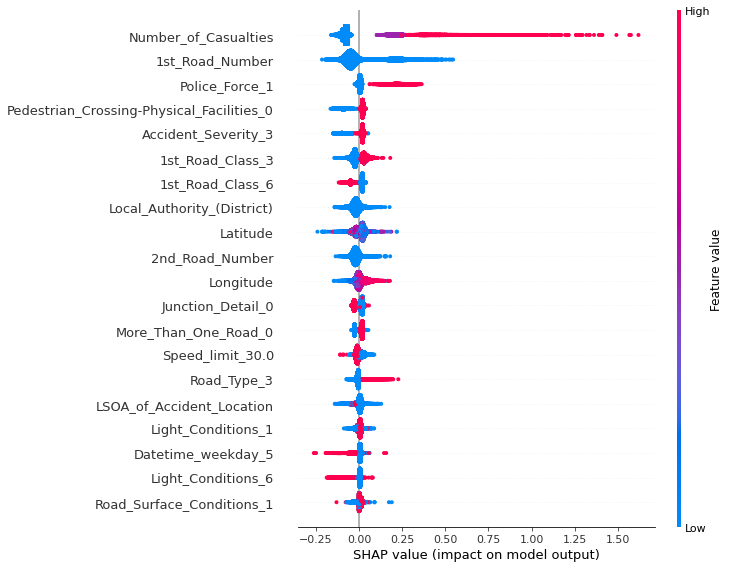

In [84]:
interpret_model(CBR)

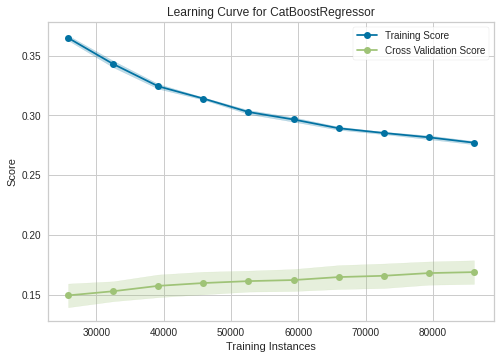

In [85]:
plot_model(CBR, 'learning')

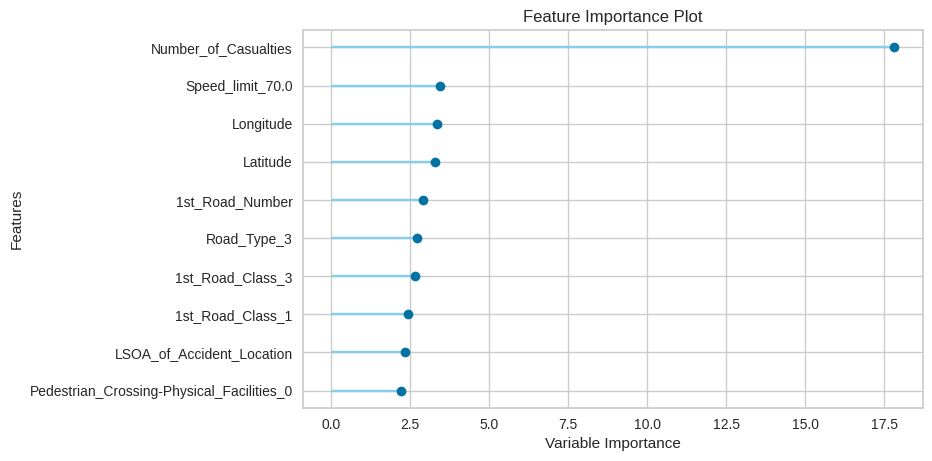

In [86]:
plot_model(CBR, 'feature')

# LR model

In [19]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4725,0.4417,0.6646,0.1369,-0.0000,0.3077
1,0.4652,0.4246,0.6516,0.1490,-0.0000,0.3081
2,0.4702,0.4288,0.6549,0.1356,-0.0000,0.3091
3,0.4704,0.4318,0.6571,0.1378,-0.0000,0.3139
4,0.4665,0.4531,0.6731,0.1296,-0.0000,0.3036
5,0.4781,0.4609,0.6789,0.1315,-0.0000,0.3129
6,0.4726,0.4431,0.6656,0.1342,-0.0000,0.3089
7,0.4692,0.4382,0.6620,0.1403,-0.0000,0.3092
8,0.4676,0.4289,0.6549,0.1336,-0.0000,0.3144
9,0.4721,0.4577,0.6766,0.1331,-0.0000,0.3070


In [20]:
tuned_lr = tune_model(lr,n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4725,0.4417,0.6646,0.1369,-0.0000,0.3077
1,0.4652,0.4246,0.6516,0.1490,-0.0000,0.3081
2,0.4702,0.4288,0.6549,0.1356,-0.0000,0.3091
3,0.4704,0.4318,0.6571,0.1378,-0.0000,0.3139
4,0.4665,0.4531,0.6731,0.1296,-0.0000,0.3036
5,0.4781,0.4609,0.6789,0.1315,-0.0000,0.3129
6,0.4726,0.4431,0.6656,0.1342,-0.0000,0.3089
7,0.4692,0.4382,0.6620,0.1403,-0.0000,0.3092
8,0.4676,0.4289,0.6549,0.1336,-0.0000,0.3144
9,0.4721,0.4577,0.6766,0.1331,-0.0000,0.3070


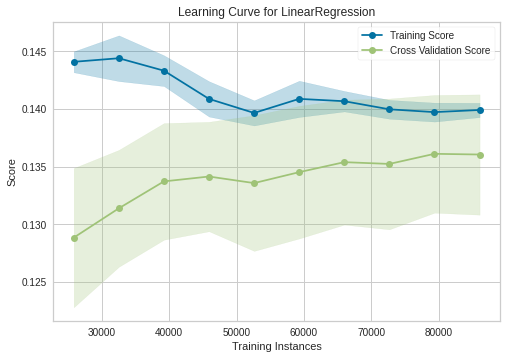

In [29]:
plot_model(tuned_lr, 'learning')

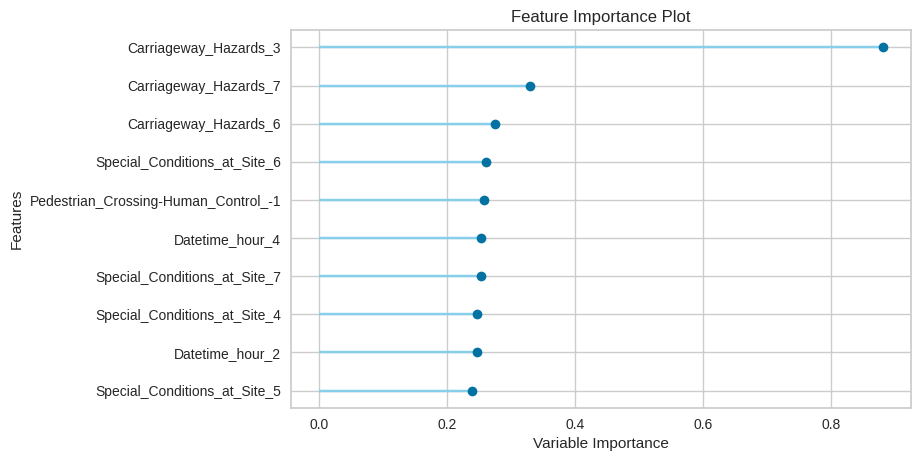

In [32]:
plot_model(tuned_lr, 'feature')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136619 entries, 0 to 136620
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               136619 non-null  object        
 1   Location_Easting_OSGR                        136612 non-null  float64       
 2   Location_Northing_OSGR                       136612 non-null  float64       
 3   Longitude                                    136612 non-null  float64       
 4   Latitude                                     136612 non-null  float64       
 5   Police_Force                                 136619 non-null  int64         
 6   Accident_Severity                            136619 non-null  int64         
 7   Number_of_Vehicles                           136619 non-null  int64         
 8   Number_of_Casualties                         136619 non-null  in

In [76]:
setup(df, 
      target='Number_of_Vehicles',
      ignore_features = ['Accident_Index',
                        'Location_Easting_OSGR',
                        'Location_Northing_OSGR',
                        'Day_of_Week',
                        'Hour',
                        'Month',
                        'Period_of_Day',
                        'Season'
                        ],
     categorical_features=['1st_Road_Number',
                          '2nd_Road_Number',
                          'Local_Authority_(District)',
                          'Police_Force'],
      numeric_features=['Number_of_Casualties'],
     normalize=True,
     normalize_method='robust',
    high_cardinality_features=['Local_Authority_(District)',
                             'Local_Authority_(Highway)',
                             '1st_Road_Number',
                             '2nd_Road_Number',
                             'LSOA_of_Accident_Location'],
     high_cardinality_method='frequency'
     )

,Description,Value
0,session_id,4093
1,Target,Number_of_Vehicles
2,Original Data,"(136619, 35)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,22
6,Ordinal Features,False
7,High Cardinality Features,True
8,High Cardinality Method,frequency
9,Transformed Train Set,"(95633, 204)"


([<pandas.io.formats.style.Styler at 0x7fc584a12910>],
 'lightgbm',
 [],
 False,
 'lightgbm',
 <MLUsecase.REGRESSION: 2>,
 None,
 52588     1
 57091     1
 75118     2
 99774     3
 68011     3
          ..
 60901     4
 94324     2
 33740     1
 118530    1
 39619     2
 Name: Number_of_Vehicles, Length: 95633, dtype: object,
 '37ce',
 KFold(n_splits=10, random_state=4093, shuffle=False),
 [('Setup Config',
                                  Description               Value
   0                               session_id                4093
   1                                   Target  Number_of_Vehicles
   2                            Original Data        (136619, 35)
   3                           Missing Values                True
   4                         Numeric Features                   3
   5                     Categorical Features                  22
   6                         Ordinal Features               False
   7                High Cardinality Features               

In [77]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.4618,0.4219,0.6495,0.1633,0.0000,0.3029,9.4620
xgboost,Extreme Gradient Boosting,0.4662,0.4318,0.6570,0.1437,0.0000,0.3055,117.6850
gbr,Gradient Boosting Regressor,0.4692,0.4329,0.6579,0.1414,0.0000,0.3117,10.0610
ridge,Ridge Regression,0.4693,0.4390,0.6625,0.1295,0.0000,0.3099,0.1110
br,Bayesian Ridge,0.4695,0.4390,0.6625,0.1294,0.0000,0.3102,1.8370
lr,Linear Regression,0.4697,0.4395,0.6629,0.1284,0.0000,0.3101,0.9300
rf,Random Forest Regressor,0.4760,0.4454,0.6673,0.1167,0.0000,0.3126,53.2810
omp,Orthogonal Matching Pursuit,0.4744,0.4465,0.6682,0.1145,0.0000,0.3148,0.2420
huber,Huber Regressor,0.4872,0.4712,0.6863,0.0651,0.0000,0.3189,10.9730
en,Elastic Net,0.4902,0.5035,0.7095,0.0015,0.0000,0.3353,0.1250


In [79]:
df['Number_of_Vehicles'].value_counts()

2     82866
1     39536
3     10963
4      2446
5       517
6       169
7        72
8        26
9        11
10        6
11        4
16        1
13        1
12        1
Name: Number_of_Vehicles, dtype: int64

In [81]:
# no datetime
setup(df, 
      target='Number_of_Vehicles',
      ignore_features = ['Accident_Index',
                        'Location_Easting_OSGR',
                        'Location_Northing_OSGR',
                        'Day_of_Week',
                        'Hour',
                        'Month',
                        'Period_of_Day',
                        'Season',
                         'Datetime',
                         'Local_Authority_(District)',
                             'Local_Authority_(Highway)',
                             '1st_Road_Number',
                             '2nd_Road_Number',
                             'LSOA_of_Accident_Location'
                        ],
     categorical_features=['1st_Road_Number',
                          '2nd_Road_Number',
                          'Local_Authority_(District)',
                          'Police_Force'],
      numeric_features=['Number_of_Casualties'],
     normalize=True,
     normalize_method='robust'
     )

,Description,Value
0,session_id,5196
1,Target,Number_of_Vehicles
2,Original Data,"(136619, 35)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,17
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(95633, 154)"


([<pandas.io.formats.style.Styler at 0x7fc4b87e99d0>],
 'lightgbm',
 [],
 False,
 'lightgbm',
 <MLUsecase.REGRESSION: 2>,
 None,
 93648     2
 81608     2
 132840    3
 8077      2
 38385     2
          ..
 121755    1
 106486    1
 10816     2
 20631     1
 18163     2
 Name: Number_of_Vehicles, Length: 95633, dtype: object,
 'fd2e',
 KFold(n_splits=10, random_state=5196, shuffle=False),
 [('Setup Config',
                                  Description               Value
   0                               session_id                5196
   1                                   Target  Number_of_Vehicles
   2                            Original Data        (136619, 35)
   3                           Missing Values                True
   4                         Numeric Features                   3
   5                     Categorical Features                  17
   6                         Ordinal Features               False
   7                High Cardinality Features               

In [82]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.4726,0.4411,0.6641,0.1242,0.0000,0.3129,0.0690
br,Bayesian Ridge,0.4727,0.4412,0.6641,0.1241,0.0000,0.3131,1.6060
omp,Orthogonal Matching Pursuit,0.4755,0.4467,0.6682,0.1132,0.0000,0.3160,0.0770
huber,Huber Regressor,0.4586,0.4481,0.6693,0.1103,0.0000,0.3046,6.8250
lr,Linear Regression,0.4733,0.4649,0.6808,0.0762,0.0000,0.3133,0.6650
lasso,Lasso Regression,0.4914,0.5038,0.7097,-0.0002,0.0000,0.3364,0.2130
en,Elastic Net,0.4914,0.5038,0.7097,-0.0002,0.0000,0.3364,0.0750
llar,Lasso Least Angle Regression,0.4914,0.5038,0.7097,-0.0002,0.0000,0.3364,0.0790
par,Passive Aggressive Regressor,0.8130,1.0292,1.0039,-1.0427,0.0000,0.5815,0.1740
lar,Least Angle Regression,245697271985028736.0000,1570568521240945474719997752623759360.0000,398615871555386368.0000,-3032993991608870203181930558210965504.0000,0.0000,153545338796059520.0000,0.0730


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=5196, solver='auto', tol=0.001)

## Statsmodels

In [83]:
predictors = ['Accident_Severity', 'Number_of_Casualties', 
             'Road_Type', 'Speed_limit', 
             'Hour', 'Month']
X = df.dropna().loc[:, predictors]
y = df.dropna().loc[:, 'Number_of_Vehicles'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

X_stats = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_stats).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     1470.
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:36:51   Log-Likelihood:            -1.0595e+05
No. Observations:              102585   AIC:                         2.119e+05
Df Residuals:                  102578   BIC:                         2.120e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0529      0.020     52.612      0.000       1.014       1.092
Accident_Severity        0.1607      0.005     31.297      0.000       0.151       0.171
Number_of_Casualties     0.2119      0.003     78.044      0.000       0.207       0.217
Road_Type               -0.0226      0.001    -17.210      0.000      -0.025      -0.020
Speed_limit              0.0041      0.000     25.687      0.000       0.004       0.004
Hour                     0.0017      0.000      4.150      0.000       0.001       0.003
Month                    0.0008      0.001      1.359      0.174      -0.000       0.002
==============================================================================
Omnibus:                    35116.205   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           369671.308
Skew:                           1.344   Prob(JB):                         0.00
Kurtosis:                      11.903   Cond. No.                         415.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
predictors = ['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Casualties', 
             'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
             'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
             'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 
             'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
             'Hour', 'Month']
X = df.dropna().loc[:, predictors]
y = df.dropna().loc[:, 'Number_of_Vehicles'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

X_stats = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_stats).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     586.2
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:14:03   Log-Likelihood:            -1.0490e+05
No. Observations:              102585   AIC:                         2.098e+05
Df Residuals:                  102565   BIC:                         2.100e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.0064      0.123      8.182      0.000       0.765       1.247
Longitude                                   0.0088      0.002      4.975      0.000       0.005       0.012
Latitude                                    0.0025      0.002      1.086      0.277      -0.002       0.007
Police_Force                                0.0010      0.000      7.744      0.000       0.001       0.001
Accident_Severity                           0.1511      0.005     29.595      0.000       0.141       0.161
Number_of_Casualties                        0.2107      0.003     78.243      0.000       0.205       0.216
Road_Type                                  -0.0239      0.001    -17.508      0.000      -0.027      -0.021
Speed_limit                                 0.0057      0.000     26.721      0.000       0.005       0.006
Junction_Detail                             0.0156      0.001     12.787      0.000       0.013       0.018
Junction_Control                            0.0095      0.001      7.352      0.000       0.007       0.012
Pedestrian_Crossing-Human_Control          -0.0807      0.014     -5.723      0.000      -0.108      -0.053
Pedestrian_Crossing-Physical_Facilities    -0.0191      0.001    -16.448      0.000      -0.021      -0.017
Light_Conditions                           -0.0290      0.001    -21.976      0.000      -0.032      -0.026
Weather_Conditions                         -0.0077      0.001     -6.136      0.000      -0.010      -0.005
Road_Surface_Conditions                    -0.0484      0.004    -12.857      0.000      -0.056      -0.041
Special_Conditions_at_Site                 -0.0133      0.003     -4.043      0.000      -0.020      -0.007
Carriageway_Hazards                        -0.0386      0.004    -10.030      0.000      -0.046      -0.031
Urban_or_Rural_Area                        -0.0393      0.006     -6.303      0.000      -0.052      -0.027
Hour                                        0.0033      0.000      7.840      0.000       0.002       0.004
Month                                       0.0012      0.001      1.916      0.055   -2.65e-05       0.002
==============================================================================
Omnibus:                    37855.047   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           431725.888
Skew:                           1.451   Prob(JB):                         0.00
Kurtosis:                      12.622   Cond. No.                     4.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number 

In [61]:
predictors = ['Longitude', 'Police_Force', 'Accident_Severity', 'Number_of_Casualties', 
             'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
             'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
             'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 
             'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
             'Hour']
X = df.dropna().loc[:, predictors]
y = np.log(df.dropna().loc[:, 'Number_of_Vehicles'].values)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

X_stats = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_stats).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     687.9
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:15:12   Log-Likelihood:                -40546.
No. Observations:              102585   AIC:                         8.113e+04
Df Residuals:                  102567   BIC:                         8.130e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1454      0.011     13.174      0.000       0.124       0.167
Longitude                                   0.0054      0.001      6.012      0.000       0.004       0.007
Police_Force                                0.0005   6.14e-05      8.516      0.000       0.000       0.001
Accident_Severity                           0.0959      0.003     35.225      0.000       0.091       0.101
Number_of_Casualties                        0.1036      0.001     72.068      0.000       0.101       0.106
Road_Type                                  -0.0142      0.001    -19.529      0.000      -0.016      -0.013
Speed_limit                                 0.0027      0.000     23.375      0.000       0.002       0.003
Junction_Detail                             0.0095      0.001     14.576      0.000       0.008       0.011
Junction_Control                            0.0119      0.001     17.234      0.000       0.011       0.013
Pedestrian_Crossing-Human_Control          -0.0481      0.008     -6.388      0.000      -0.063      -0.033
Pedestrian_Crossing-Physical_Facilities    -0.0113      0.001    -18.339      0.000      -0.013      -0.010
Light_Conditions                           -0.0182      0.001    -25.978      0.000      -0.020      -0.017
Weather_Conditions                         -0.0043      0.001     -6.399      0.000      -0.006      -0.003
Road_Surface_Conditions                    -0.0309      0.002    -15.439      0.000      -0.035      -0.027
Special_Conditions_at_Site                 -0.0100      0.002     -5.677      0.000      -0.013      -0.007
Carriageway_Hazards                        -0.0279      0.002    -13.553      0.000      -0.032      -0.024
Urban_or_Rural_Area                        -0.0153      0.003     -4.632      0.000      -0.022      -0.009
Hour                                        0.0024      0.000     10.486      0.000       0.002       0.003
==============================================================================
Omnibus:                     1166.899   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1535.648
Skew:                          -0.170   Prob(JB):                         0.00
Kurtosis:                       3.494   Cond. No.                         512.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
predictors = ['Longitude', 'Police_Force', 'Accident_Severity', 'Number_of_Casualties', 
             'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
             'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
             'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 
             'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
             'Hour']
X = df.dropna().loc[:, predictors]
X['Number_of_Casualties'] = np.log(X['Number_of_Casualties'])
y = df.dropna().loc[:, 'Number_of_Vehicles'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

X_stats = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_stats).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     706.4
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:18:05   Log-Likelihood:            -1.0451e+05
No. Observations:              102585   AIC:                         2.090e+05
Df Residuals:                  102567   BIC:                         2.092e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.3669      0.020     67.071      0.000       1.327       1.407
Longitude                                   0.0087      0.002      5.211      0.000       0.005       0.012
Police_Force                                0.0010      0.000      8.338      0.000       0.001       0.001
Accident_Severity                           0.1484      0.005     29.232      0.000       0.138       0.158
Number_of_Casualties                        0.4642      0.006     83.453      0.000       0.453       0.475
Road_Type                                  -0.0242      0.001    -17.870      0.000      -0.027      -0.022
Speed_limit                                 0.0055      0.000     25.525      0.000       0.005       0.006
Junction_Detail                             0.0152      0.001     12.509      0.000       0.013       0.018
Junction_Control                            0.0093      0.001      7.257      0.000       0.007       0.012
Pedestrian_Crossing-Human_Control          -0.0769      0.014     -5.479      0.000      -0.104      -0.049
Pedestrian_Crossing-Physical_Facilities    -0.0191      0.001    -16.544      0.000      -0.021      -0.017
Light_Conditions                           -0.0290      0.001    -22.102      0.000      -0.032      -0.026
Weather_Conditions                         -0.0074      0.001     -5.932      0.000      -0.010      -0.005
Road_Surface_Conditions                    -0.0494      0.004    -13.230      0.000      -0.057      -0.042
Special_Conditions_at_Site                 -0.0129      0.003     -3.953      0.000      -0.019      -0.007
Carriageway_Hazards                        -0.0384      0.004    -10.010      0.000      -0.046      -0.031
Urban_or_Rural_Area                        -0.0418      0.006     -6.757      0.000      -0.054      -0.030
Hour                                        0.0031      0.000      7.441      0.000       0.002       0.004
==============================================================================
Omnibus:                    38415.132   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           365294.957
Skew:                           1.535   Prob(JB):                         0.00
Kurtosis:                      11.720   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Scikit-learn

### Linear regression

In [110]:
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errors, test_errors = [], []
    for n in range(1, len(X_train)):
        model.fit(X_train[:n], y_train[:n])
        y_train_predict = model.predict(X_train[:n])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:n], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(test_errors), 'b-', linewidth=3, label='test')

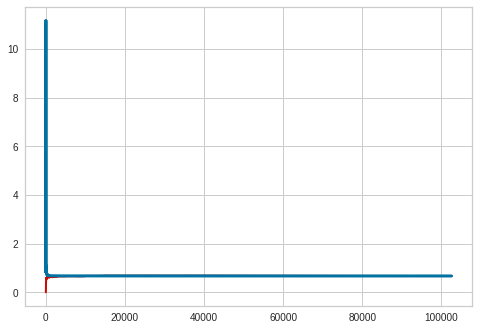

In [170]:
predictors = [x for x in df.columns if x not in ('Accident_Index', 'Number_of_Vehicles', 'Date', 'Time', 'Datetime',
                                                        'Local_Authority_(Highway)', 'LSOA_of_Accident_Location')]
X = df.dropna().loc[:, predictors]
y = df.dropna().loc[:, 'Number_of_Vehicles'].values
period_dummy = pd.get_dummies(X['Period_of_Day'])
season_dummy = pd.get_dummies(X['Season'])
X = pd.concat([X, period_dummy, season_dummy], axis=1)
X.drop(['Period_of_Day', 'Season'], axis=1, inplace=True)
X


lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

### KNN

In [173]:
knn = KNeighborsRegressor(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn.fit(X, y)

knn.score(X_test, y_test)

0.2647389903086067

In [ ]:
grid_params = {
    'n_neighbours': [3, 5, 7, 9, 11, 15] , ,
}

gs = GridSearchCV(
    )

## TensorFlow tests

In [127]:
df.isna().sum()

Accident_Index                                    0
Location_Easting_OSGR                             7
Location_Northing_OSGR                            7
Longitude                                         7
Latitude                                          7
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                      37
Junction_Detail                                   0
Junction_Control                                  0
2nd_Road_Class                                    0
2nd_Road_Num

In [153]:
tf_df = df.copy()
tf_df.drop(columns=['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'LSOA_of_Accident_Location',
                   'Local_Authority_(Highway)', 'Accident_Index', 'Datetime'], 
           inplace=True)
tf_df.isna().sum()

Police_Force                                    0
Accident_Severity                               0
Number_of_Vehicles                              0
Number_of_Casualties                            0
Day_of_Week                                     0
Local_Authority_(District)                      0
1st_Road_Class                                  0
1st_Road_Number                                 0
Road_Type                                       0
Speed_limit                                    37
Junction_Detail                                 0
Junction_Control                                0
2nd_Road_Class                                  0
2nd_Road_Number                                 0
Pedestrian_Crossing-Human_Control               0
Pedestrian_Crossing-Physical_Facilities         0
Light_Conditions                                0
Weather_Conditions                              0
Road_Surface_Conditions                         0
Special_Conditions_at_Site                      0


In [154]:
tf_df.dropna(inplace=True)
tf_df.isna().sum()

Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_at_Site                     0
Carriageway_Hazards 

In [155]:
tf_df.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month,Period_of_Day,Season,More_Than_One_Road
0,1,3,2,1,3,28,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1,2.0,11.0,Early morning,Autumn,1
1,1,3,1,1,3,18,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,0.0,11.0,Early morning,Autumn,0
2,1,3,1,1,3,26,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,1.0,11.0,Early morning,Autumn,0
3,1,3,1,1,3,22,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,9.0,11.0,Morning commute,Autumn,0
4,1,3,2,1,3,25,3,312,3,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,7.0,11.0,Morning commute,Autumn,1


In [156]:
period_dummy = pd.get_dummies(tf_df['Period_of_Day'])
season_dummy = pd.get_dummies(tf_df['Season'])
pd.concat([tf_df, period_dummy, season_dummy], axis=1)
tf_df.drop(columns=['Period_of_Day', 'Season'], axis=1, inplace=True)

tf_df.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month,More_Than_One_Road
0,1,3,2,1,3,28,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1,2.0,11.0,1
1,1,3,1,1,3,18,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,0.0,11.0,0
2,1,3,1,1,3,26,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,1.0,11.0,0
3,1,3,1,1,3,22,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,9.0,11.0,0
4,1,3,2,1,3,25,3,312,3,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,7.0,11.0,1


In [157]:
train_dataset = tf_df.sample(frac=0.8, random_state=0)
test_dataset = tf_df.drop(train_dataset.index)

In [158]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Number_of_Vehicles')
test_labels = test_features.pop('Number_of_Vehicles')

In [159]:
normalizer = preprocessing.Normalization()

In [160]:
normalizer.adapt(np.array(train_features))

In [161]:
casualties = np.array(train_features['Number_of_Casualties'])

casualties_normalizer = preprocessing.Normalization(input_shape=[1,])
casualties_normalizer.adapt(casualties)

In [162]:
casualties_model = tf.keras.Sequential([
    casualties_normalizer,
    layers.Dense(units=1)
])

casualties_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_4 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [163]:
casualties_model.predict(casualties[:10])

array([[-0.2667115],
       [-0.2667115],
       [-0.2667115],
       [-0.2667115],
       [-0.2667115],
       [ 2.9780133],
       [-0.2667115],
       [ 1.3556509],
       [-0.2667115],
       [-0.2667115]], dtype=float32)

In [164]:
casualties_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [165]:
history = casualties_model.fit(
    train_features['Number_of_Casualties'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

In [166]:
test_results = {}

test_results['casualties_model'] = casualties_model.evaluate(
    test_features['Number_of_Casualties'],
    test_labels, verbose=0)

In [167]:
x = tf.linspace(0.0, 250, 251)
y = casualties_model.predict(x)

In [171]:
def plot_casualties(x, y):
    plt.scatter(train_features['Number_of_Casualties'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Number_of_Casualties')
    plt.ylabel('Number_of_Vehicles')
    plt.legend()

ValueError: x and y must have same first dimension, but have shapes (251,) and (128232,)

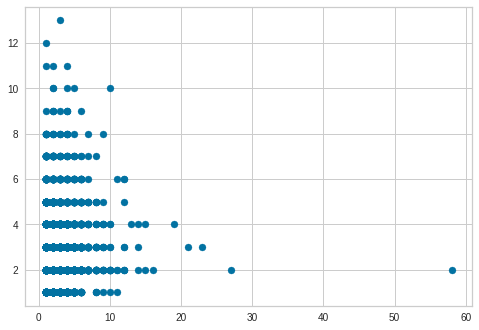

In [172]:
plot_casualties(x,y)

# 6. Model Deployment
TBC